<a href="https://colab.research.google.com/github/122333D/project/blob/master/Predictmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive/ctuCsv"

 All_162182.csv      All_train.csv  'data train'	   groupby199.csv
 All_train_162.csv   ctu-10.csv      finalPredictyesssss   groupby19.csv
 All_train199.csv    ctu-11.csv      groupby11.csv	   rfcBotreduceft.pkl
 All_train_19.csv    ctu-42.csv      groupby162182.csv	   test162182.csv
 All_train19.csv    'data test'      groupby162.csv	   yhat19.csv


In [0]:
import pandas as pd 
df = pd.read_csv('/content/gdrive/My Drive/ctuCsv/groupby19.csv')
df.head()

,Flow id,No.,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,Protocols in frame,Time to live,udp_Length,IP_Flags,Sequence number,Next sequence number,TCP Segment Len,tcp_Flags,isBot,Flow name,NumForward,Forward,IOPR,Total,FPL,NumPackets,BytesTotal,StdDevLen,SameLenPktRatio,Duration,AvgPktPerSec,BitsPerSec,APL,IAT,isNull,NPEx,reconnects
0,2578261,5437860,1937.800,147.32.86.58,2.136.152.92,UDP,357,48784,29387,eth:ethertype:ip:udp:wol,127,323.0,0x0000,NaN,NaN,NaN,0,0,2.136.152.92-147.32.86.58-29387-48784-UDP,0,0,-1.0,1,357,1,357,0.00,1.0,0.000000,0.00,0.0,357.000,0.000000,0,0,0
1,922661,1916650,672.836,83.208.169.216,147.32.85.26,TCP,70,26471,62860,eth:ethertype:ip:tcp,118,NaN,0x4000,16909705.0,16909721.0,16.0,24,0,83.208.169.216-147.32.85.26-26471-62860-TCP,1,1,1.0,2,70,2,130,5.00,1.0,0.000238,8403.36,4369750.0,65.000,0.000119,1,2,0
2,4865614,10407401,3462.620,147.32.85.103,74.125.108.137,TCP,66,60847,80,eth:ethertype:ip:tcp,62,NaN,0x4000,1777.0,1777.0,0.0,16,0,74.125.108.137-147.32.85.103-80-60847-TCP,0,0,-1.0,2,66,2,132,0.00,0.5,0.000167,11976.00,6323350.0,66.000,0.000083,2,4,2
3,3159587,6844893,2225.180,147.32.84.59,157.22.19.142,TCP,60,1575,80,eth:ethertype:ip:tcp,126,NaN,0x4000,869.0,869.0,0.0,16,0,157.22.19.142-147.32.84.59-80-1575-TCP,0,0,-1.0,1,60,1,60,0.00,1.0,0.000000,0.00,0.0,60.000,0.000000,1,1,0
4,4565672,9802276,3213.990,83.208.169.216,147.32.85.26,TCP,1506,26471,62860,eth:ethertype:ip:tcp,118,NaN,0x4000,65656149.0,65657601.0,1452.0,16,0,83.208.169.216-147.32.85.26-26471-62860-TCP,2,1,0.5,3,1506,3,1628,681.18,1.0,0.000605,4958.68,21527300.0,542.667,0.000202,1,3,0


In [0]:
df = df.sort_values(by=['Flow id']).reset_index(drop=True)

In [0]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(['NBNS', 'SMB', 'PKIX-CRL', 'TCP', 'SIP', 'BROWSER', 'SMTP|IMF', 'SMTP', 'DNS', 'HTTP/XML', 'SSDP', 'SNMP', 'PKTC', 'Laplink', 'IRC', 'UDP', 'SSL', 'ICMP', 'NBSS', 'Socks', 'DCERPC', 'LANMAN', 'HTTP', 'SSLv2', 'TLSv1'])
df['Protocol_2']=num.fit_transform(df['Protocol']).astype('int')

In [0]:
df['IP_Flags'] = df['IP_Flags'].apply(lambda x:int(x,16) if x!='' else 0)

In [0]:
df = df.fillna(-1)

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.asarray(df[['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time', 'BytesTotal', 'Sequence number']])
y = np.asarray(df['isBot'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(X_train,y_train)
yhat = rfc.predict(X_test)

In [0]:
len(df)

6077459

In [0]:
len(X_test)

1823238

In [0]:
X_test[0:1]

array([[ 6.286000e+04,  1.109000e+03, -1.000000e+00,  6.000000e+01,
         6.000000e+01,  1.180000e+02,  6.000000e+01,  2.492270e+03,
         6.000000e+01,  1.232916e+06]])

In [0]:
y_hat = pd.DataFrame(data = yhat, columns = ['y_hat'])
y_hat.head()

,y_hat
0,0
1,0
2,0
3,0
4,0


In [0]:
# y_test['preds'] = yhat
df_out = pd.merge(df,y_hat,how = 'left',left_index = True , right_index = True )

In [0]:
len(df_out)

6077459

In [0]:
df_out['y_hat'].unique()

array([ 0.,  1., nan])

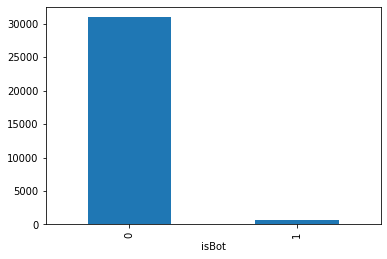

In [0]:
import matplotlib.pyplot as plt
df_out[df_out['y_hat']==1].groupby(['isBot'])['Flow id'].count().plot(kind='bar')

plt.show()

In [0]:
df_out.to_csv(r'/content/gdrive/My Drive/ctuCsv/yhat19.csv',index = None,header=True)

In [0]:
dtest = pd.read_csv('/content/gdrive/My Drive/ctuCsv/groupby162.csv')
dtest.head()

,Flow id,No.,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,Protocols in frame,Time to live,udp_Length,IP_Flags,Sequence number,Next sequence number,TCP Segment Len,tcp_Flags,isBot,Flow name,NumForward,Forward,IOPR,Total,FPL,NumPackets,BytesTotal,StdDevLen,SameLenPktRatio,Duration,AvgPktPerSec,BitsPerSec,APL,IAT,isNull,NPEx,reconnects
0,2578261,4942135,823.019,46.4.84.230,147.32.84.59,UDP,1083,54012,7525,eth:ethertype:ip:udp:wol,54,1049.0,0x4000,NaN,NaN,NaN,0,0,46.4.84.230-147.32.84.59-54012-7525-UDP,1,1,0.0,1,1083,1,1083,0.0,1.0,0.0,0.0,0.0,1083.0,0.0,0,0,0
1,922661,2065098,272.037,147.32.84.94,176.9.0.180,UDP,60,7103,52012,eth:ethertype:ip:udp:lbtrm,63,16.0,0x4000,NaN,NaN,NaN,0,0,176.9.0.180-147.32.84.94-52012-7103-UDP,0,0,-1.0,1,60,1,60,0.0,1.0,0.0,0.0,0.0,60.0,0.0,0,0,0
2,3159587,6014109,1007.610,147.32.84.59,188.40.116.162,UDP,1082,7525,50012,eth:ethertype:ip:udp:wol,62,1048.0,0x4000,NaN,NaN,NaN,0,0,188.40.116.162-147.32.84.59-50012-7525-UDP,0,0,-1.0,1,1082,1,1082,0.0,1.0,0.0,0.0,0.0,1082.0,0.0,0,0,0
3,455697,1004056,100.024,125.228.221.40,147.32.84.94,UDP,78,7191,7103,eth:ethertype:ip:udp:rtps,106,44.0,0x0000,NaN,NaN,NaN,0,0,147.32.84.94-125.228.221.40-7103-7191-UDP,0,0,-1.0,1,78,1,78,0.0,1.0,0.0,0.0,0.0,78.0,0.0,0,0,0
4,1032731,2250943,308.973,147.32.84.59,188.40.113.241,UDP,1083,7525,50012,eth:ethertype:ip:udp:wol,62,1049.0,0x4000,NaN,NaN,NaN,0,0,188.40.113.241-147.32.84.59-50012-7525-UDP,0,0,-1.0,1,1083,1,1083,0.0,1.0,0.0,0.0,0.0,1083.0,0.0,0,0,0


In [0]:
dtest = dtest.sort_values(by=['Flow id']).reset_index(drop=True)

In [0]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(['NBNS', 'SMB', 'PKIX-CRL', 'TCP', 'SIP', 'BROWSER', 'SMTP|IMF', 'SMTP', 'DNS', 'HTTP/XML', 'SSDP', 'SNMP', 'PKTC', 'Laplink', 'IRC', 'UDP', 'SSL', 'ICMP', 'NBSS', 'Socks', 'DCERPC', 'LANMAN', 'HTTP', 'SSLv2', 'TLSv1'])
dtest['Protocol_2']=num.fit_transform(dtest['Protocol']).astype('int')

In [0]:
dtest['IP_Flags'] = dtest['IP_Flags'].apply(lambda x:int(x,16) if x!='' else 0)

In [0]:
dtest = dtest.fillna(-1)

In [0]:
frames = [df,dtest]

result = pd.concat(frames)

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.asarray(result[['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time', 'BytesTotal', 'Sequence number']])
y = np.asarray(result['isBot'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(X_train,y_train)
yhat = rfc.predict(X_test)

In [0]:
y_hat = pd.DataFrame(data = yhat, columns = ['y_hat'])
y_hat.head()

,y_hat
0,0
1,0
2,0
3,0
4,0


In [0]:
df_out = pd.merge(result,y_hat,how = 'left',left_index = True , right_index = True )

In [0]:
len(df_out)

10090150

In [0]:
df_out.to_csv(r'/content/gdrive/My Drive/ctuCsv/yhat16219.csv',index = None,header=True)